In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance/student/student-mat.csv
/kaggle/input/student-performance/student/student-por.csv
/kaggle/input/student-performance/student/student.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv("/kaggle/input/student-performance/student/student-por.csv",sep=";")

In [4]:
df.rename(columns = {'G3':'Grade'},inplace=True)

In [5]:
df.drop(['G1',"G2"],axis=1,inplace=True)

In [6]:
df.shape

(649, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,649.0,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
Medu,649.0,2.514638,1.134552,0.0,2.0,2.0,4.0,4.0
Fedu,649.0,2.306626,1.099931,0.0,1.0,2.0,3.0,4.0
traveltime,649.0,1.568567,0.748660,1.0,1.0,1.0,2.0,4.0
studytime,649.0,1.930663,0.829510,1.0,1.0,2.0,2.0,4.0
failures,649.0,0.221880,0.593235,0.0,0.0,0.0,0.0,3.0
famrel,649.0,3.930663,0.955717,1.0,4.0,4.0,5.0,5.0
freetime,649.0,3.180277,1.051093,1.0,3.0,3.0,4.0,5.0
goout,649.0,3.184900,1.175766,1.0,2.0,3.0,4.0,5.0
Dalc,649.0,1.502311,0.924834,1.0,1.0,1.0,2.0,5.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


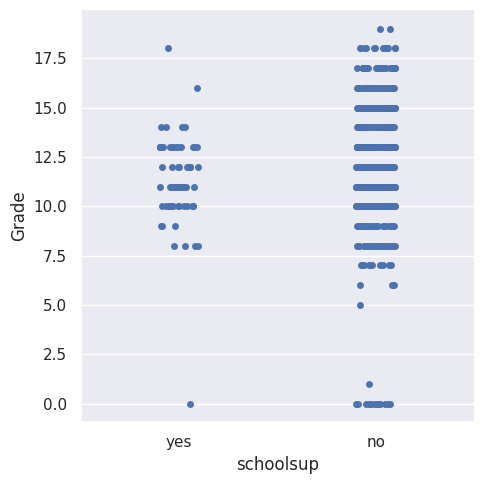

In [9]:
sns.catplot(x='schoolsup',y='Grade',data=df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


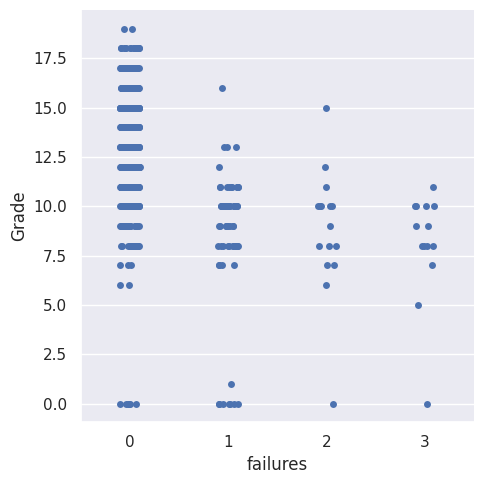

In [10]:
sns.catplot(x='failures',y='Grade',data=df)

In [11]:
print(df.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
Grade         0
dtype: int64


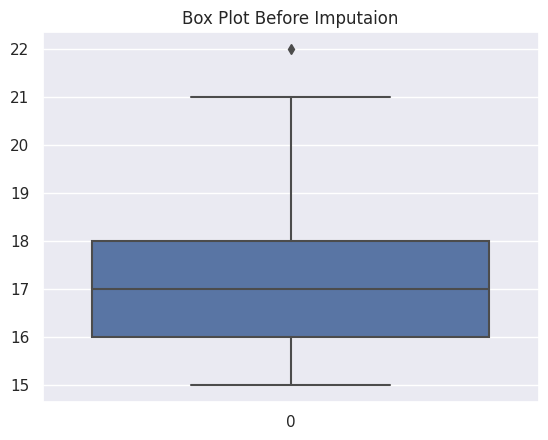

In [12]:
sns.boxplot(df['age'])
plt.title('Box Plot Before Imputaion')
plt.show()

In [13]:
Q1 =df['age'].quantile(0.25)
Q3 =df['age'].quantile(0.75)
IQR= Q3-Q1
lower_tail = Q1-1.5*IQR
upper_tail = Q3 + 1.5*IQR
df.loc[df['age'] > upper_tail,'age'] = upper_tail
df.loc[df['age'] < lower_tail,'age'] = upper_tail

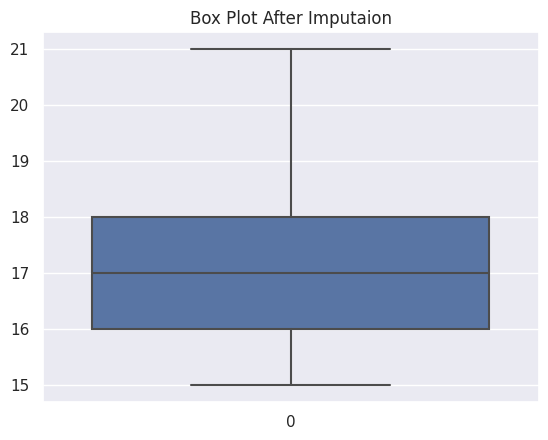

In [14]:
sns.boxplot(df['age'])
plt.title('Box Plot After Imputaion')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='absences', ylabel='Density'>

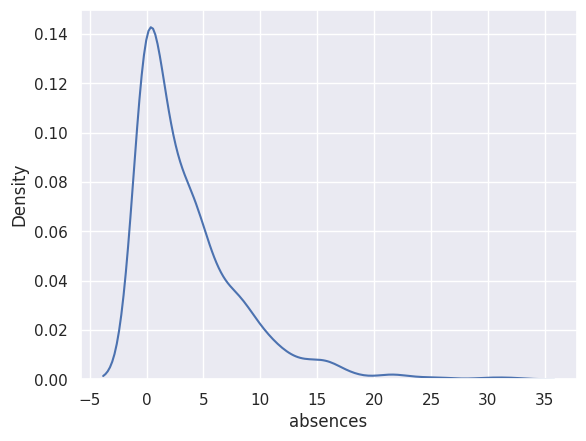

In [15]:
sns.kdeplot(df['absences'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Walc', ylabel='Density'>

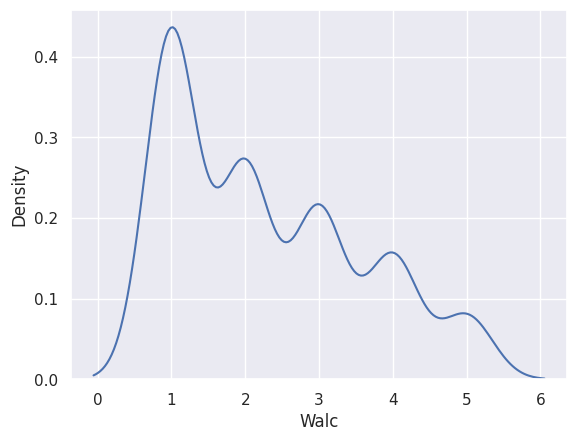

In [16]:
sns.kdeplot(df['Walc'])

<Axes: >

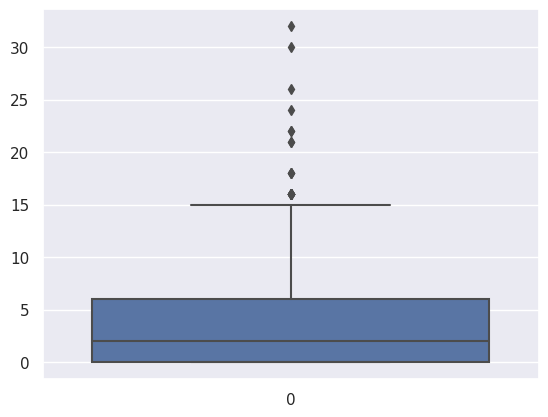

In [17]:
sns.boxplot(df['absences'])

In [18]:
df.loc[df['absences'] > 15,'absences'] = 15

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='absences', ylabel='Density'>

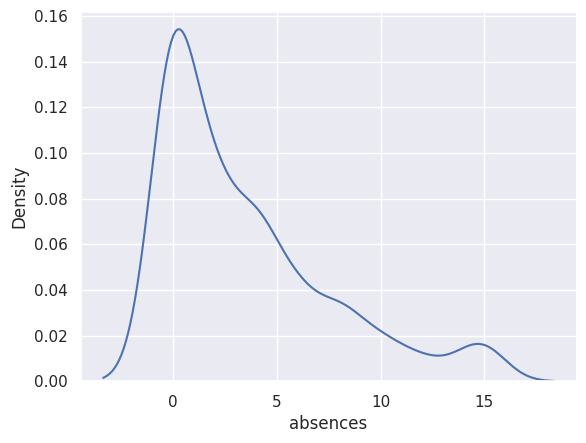

In [19]:
sns.kdeplot(df['absences'])

In [20]:
df['failures'].value_counts(normalize=True)

failures
0    0.845917
1    0.107858
2    0.024653
3    0.021572
Name: proportion, dtype: float64

In [21]:
df.groupby('failures')['Grade'].mean()

failures
0    12.510018
1     8.642857
2     8.812500
3     8.071429
Name: Grade, dtype: float64

In [22]:
df['failures'] = np.where(df['failures']==0,0,1)

In [23]:
df['failures'].value_counts(normalize=True)

failures
0    0.845917
1    0.154083
Name: proportion, dtype: float64

In [24]:
numeric_columns= list(df.select_dtypes(np.number))
cat_columns = list(df.select_dtypes(include='object'))

In [25]:
for col in cat_columns:
    print(col,"  ", df[col].unique())

school    ['GP' 'MS']
sex    ['F' 'M']
address    ['U' 'R']
famsize    ['GT3' 'LE3']
Pstatus    ['A' 'T']
Mjob    ['at_home' 'health' 'other' 'services' 'teacher']
Fjob    ['teacher' 'other' 'services' 'health' 'at_home']
reason    ['course' 'other' 'home' 'reputation']
guardian    ['mother' 'father' 'other']
schoolsup    ['yes' 'no']
famsup    ['no' 'yes']
paid    ['no' 'yes']
activities    ['no' 'yes']
nursery    ['yes' 'no']
higher    ['yes' 'no']
internet    ['no' 'yes']
romantic    ['no' 'yes']


In [26]:
df['school'] = np.where(df['school']=='GP',1,0)
df['sex'] = np.where(df['sex']=='F',1,0)
df['address'] = np.where(df['address']=='U',1,0)
df['famsize'] = np.where(df['famsize']=='GT3',1,0)
df['Pstatus'] = np.where(df['Pstatus']=='A',1,0)
df['schoolsup'] = np.where(df['schoolsup']=='yes',1,0)
df['famsup'] = np.where(df['famsup']=='yes',1,0)
df['paid'] = np.where(df['paid']=='yes',1,0)
df['activities'] = np.where(df['activities']=='yes',1,0)
df['nursery'] = np.where(df['nursery']=='yes',1,0)
df['higher'] = np.where(df['higher']=='yes',1,0)
df['internet'] = np.where(df['internet']=='yes',1,0)
df['romantic'] = np.where(df['romantic']=='yes',1,0)

In [27]:
df['Mjob']=df['Mjob'].map({'at_home':11 ,'health':13, 'other':12, 'services':12, 'teacher':13})
df['Fjob']=df['Fjob'].map({'at_home':11,'health':13, 'other':12, 'services':12, 'teacher':14})
df['reason'] = df['reason'].map({'course':12,'other':11,'home':12, 'reputation':13})
df['guardian'] = df['guardian'].map({'mother':12,'father':12, 'other':11})

In [28]:
df[numeric_columns].corr()['Grade'].sort_values()

failures     -0.438403
Dalc         -0.204719
Walc         -0.176619
traveltime   -0.127173
freetime     -0.122705
age          -0.104315
health       -0.098851
absences     -0.098657
goout        -0.087641
famrel        0.063361
Fedu          0.211800
Medu          0.240151
studytime     0.249789
Grade         1.000000
Name: Grade, dtype: float64

In [29]:
from scipy.stats import spearmanr
for i in cat_columns:
    coef, p = spearmanr(df[i],df['Grade'])   
    print(i ,': Spr: %.3f ' % coef)
    print('p=%.3f' % p)

school : Spr: 0.285 
p=0.000
sex : Spr: 0.134 
p=0.001
address : Spr: 0.170 
p=0.000
famsize : Spr: -0.019 
p=0.627
Pstatus : Spr: 0.005 
p=0.896
Mjob : Spr: 0.233 
p=0.000
Fjob : Spr: 0.136 
p=0.001
reason : Spr: 0.194 
p=0.000
guardian : Spr: 0.099 
p=0.012
schoolsup : Spr: -0.087 
p=0.026
famsup : Spr: 0.029 
p=0.455
paid : Spr: -0.057 
p=0.149
activities : Spr: 0.082 
p=0.037
nursery : Spr: 0.052 
p=0.182
higher : Spr: 0.353 
p=0.000
internet : Spr: 0.157 
p=0.000
romantic : Spr: -0.072 
p=0.067


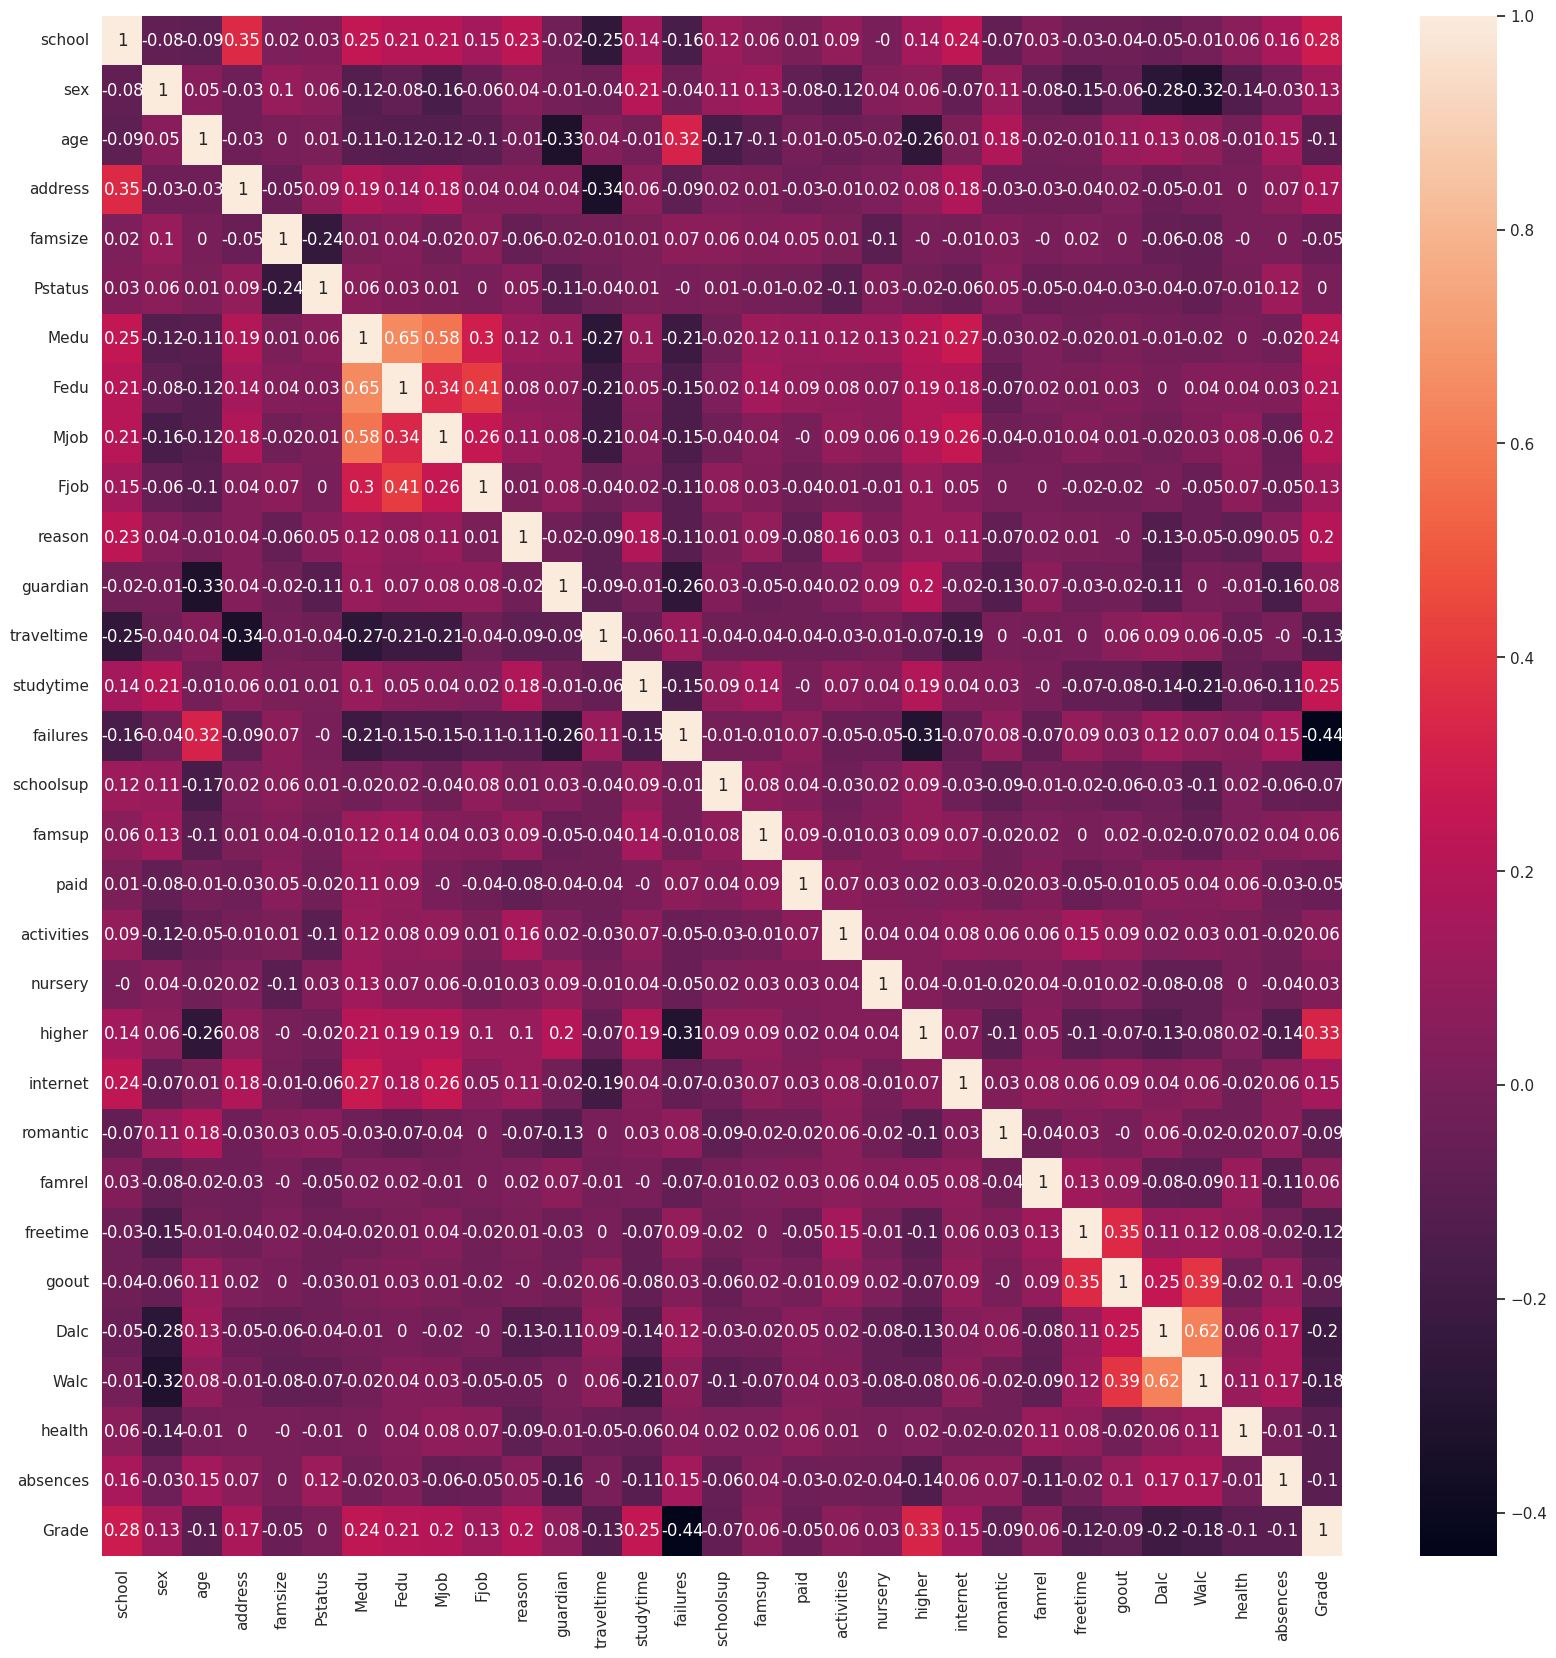

In [30]:
matrix = df.corr().round(2)
plt.figure(figsize=(20,20))
sns.heatmap(matrix, annot=True)
plt.show()

In [31]:
X=df.drop('Grade',axis=1)
y=df['Grade']

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data.sort_values(by='VIF'))

       feature          VIF
17        paid     1.143674
15   schoolsup     1.238857
5      Pstatus     1.302894
14    failures     1.562183
22    romantic     1.744829
29    absences     2.079820
18  activities     2.168310
16      famsup     2.848635
1          sex     3.316104
4      famsize     3.815922
0       school     4.127666
3      address     4.261009
21    internet     5.174084
19     nursery     5.358628
26        Dalc     6.414201
12  traveltime     6.720225
28      health     7.623034
13   studytime     7.712669
27        Walc     8.560109
7         Fedu    10.688997
20      higher    11.802618
25       goout    11.808462
24    freetime    12.616587
6         Medu    14.421323
23      famrel    19.866941
2          age   218.967004
10      reason   488.131647
8         Mjob   559.948901
9         Fjob   565.050571
11    guardian  1028.193617


In [33]:
import statsmodels.api as sm

In [34]:
X= sm.add_constant(X)

In [35]:
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     12.11
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.00e-44
Time:                        09:46:56   Log-Likelihood:                -1531.4
No. Observations:                 649   AIC:                             3125.
Df Residuals:                     618   BIC:                             3264.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0921      7.483      0.547      0.5

In [36]:
less_significant=['address','famsize','Pstatus','Medu','Mjob','Fjob','reason','guardian','traveltime','famsup','paid','activities','nursery','internet','famrel','freetime','goout','Dalc','absences']

In [37]:
X.drop(columns=less_significant,inplace=True)

In [38]:
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  Grade   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     31.04
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.41e-52
Time:                        09:46:56   Log-Likelihood:                -1542.2
No. Observations:                 649   AIC:                             3108.
Df Residuals:                     637   BIC:                             3162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3048      1.687      3.738      0.0